<a href="https://colab.research.google.com/github/ameschini2206/Data-Science-2/blob/main/conexion_API_open_meteo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API-Open-Meteo
### Coderhouse - Data Science
Profe Jorge Ruiz

In [ ]:
# Material importante para revisar https://www.nylas.com/blog/use-python-requests-module-rest-apis/

In [3]:
import requests
import pandas as pd
from google.colab import userdata


In [4]:
response = requests.get(f'https://api.open-meteo.com/v1/forecast?latitude=-34.59&longitude=-58.38&current=temperature_2m,relative_humidity_2m,weather_code')
consulta=response.json()
consulta

{'latitude': -34.625,
 'longitude': -58.5,
 'generationtime_ms': 0.051140785217285156,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 7.0,
 'current_units': {'time': 'iso8601',
  'interval': 'seconds',
  'temperature_2m': '°C',
  'relative_humidity_2m': '%',
  'weather_code': 'wmo code'},
 'current': {'time': '2026-01-13T01:15',
  'interval': 900,
  'temperature_2m': 28.1,
  'relative_humidity_2m': 56,
  'weather_code': 0}}

In [5]:
import requests

response = requests.get('https://api.open-meteo.com/v1/forecast?latitude=-34.59&longitude=-58.38&daily=temperature_2m_max,temperature_2m_min,relative_humidity_2m_max,relative_humidity_2m_min,weather_code&start_date=2025-11-15&end_date=2026-01-09')
consulta = response.json()
consulta

{'latitude': -34.625,
 'longitude': -58.5,
 'generationtime_ms': 0.2536773681640625,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 7.0,
 'daily_units': {'time': 'iso8601',
  'temperature_2m_max': '°C',
  'temperature_2m_min': '°C',
  'relative_humidity_2m_max': '%',
  'relative_humidity_2m_min': '%',
  'weather_code': 'wmo code'},
 'daily': {'time': ['2025-11-15',
   '2025-11-16',
   '2025-11-17',
   '2025-11-18',
   '2025-11-19',
   '2025-11-20',
   '2025-11-21',
   '2025-11-22',
   '2025-11-23',
   '2025-11-24',
   '2025-11-25',
   '2025-11-26',
   '2025-11-27',
   '2025-11-28',
   '2025-11-29',
   '2025-11-30',
   '2025-12-01',
   '2025-12-02',
   '2025-12-03',
   '2025-12-04',
   '2025-12-05',
   '2025-12-06',
   '2025-12-07',
   '2025-12-08',
   '2025-12-09',
   '2025-12-10',
   '2025-12-11',
   '2025-12-12',
   '2025-12-13',
   '2025-12-14',
   '2025-12-15',
   '2025-12-16',
   '2025-12-17',
   '2025-12-18',
   '2025-12-19',
   '2025

In [6]:
print(consulta["daily"]['time'])
print(consulta["daily"]['temperature_2m_max'])
print(consulta["daily"]['temperature_2m_min'])

['2025-11-15', '2025-11-16', '2025-11-17', '2025-11-18', '2025-11-19', '2025-11-20', '2025-11-21', '2025-11-22', '2025-11-23', '2025-11-24', '2025-11-25', '2025-11-26', '2025-11-27', '2025-11-28', '2025-11-29', '2025-11-30', '2025-12-01', '2025-12-02', '2025-12-03', '2025-12-04', '2025-12-05', '2025-12-06', '2025-12-07', '2025-12-08', '2025-12-09', '2025-12-10', '2025-12-11', '2025-12-12', '2025-12-13', '2025-12-14', '2025-12-15', '2025-12-16', '2025-12-17', '2025-12-18', '2025-12-19', '2025-12-20', '2025-12-21', '2025-12-22', '2025-12-23', '2025-12-24', '2025-12-25', '2025-12-26', '2025-12-27', '2025-12-28', '2025-12-29', '2025-12-30', '2025-12-31', '2026-01-01', '2026-01-02', '2026-01-03', '2026-01-04', '2026-01-05', '2026-01-06', '2026-01-07', '2026-01-08', '2026-01-09']
[33.8, 27.3, 23.2, 28.8, 24.1, 24.5, 20.7, 20.9, 23.0, 25.4, 29.6, 30.7, 30.1, 30.1, 19.6, 20.1, 23.6, 27.6, 31.5, 34.7, 33.5, 31.6, 27.1, 25.1, 23.8, 29.6, 31.7, 34.5, 35.0, 24.4, 27.4, 25.2, 30.3, 33.3, 31.9, 26.0

In [7]:
# vamos a crear un rango de fechas
fechas = pd.date_range(start='2025-11-15', end='2026-01-09', freq='D')  # Frecuencia diaria

#tambien podemos usarlo de esa forma
# fechas = pd.date_range(start='2023-01-01', periods=365, freq='D')

df = pd.DataFrame({'T_max_baires': consulta["daily"]['temperature_2m_max'], "T_min_baires":consulta["daily"]['temperature_2m_min'], 'H_max_baires': consulta["daily"]['relative_humidity_2m_max'], "H_min_baires":consulta["daily"]['relative_humidity_2m_min']}, index=fechas)
df



,T_max_baires,T_min_baires,H_max_baires,H_min_baires
2025-11-15,33.8,17.7,75,28
2025-11-16,27.3,19.8,95,40
2025-11-17,23.2,9.9,76,36
2025-11-18,28.8,15.5,68,29
2025-11-19,24.1,15.5,79,39
2025-11-20,24.5,16.4,91,42
2025-11-21,20.7,14.8,94,60
2025-11-22,20.9,10.0,81,43
2025-11-23,23.0,12.8,87,37
2025-11-24,25.4,15.4,89,40


In [8]:
df.describe()

,T_max_baires,T_min_baires,H_max_baires,H_min_baires
count,56.000000,56.000000,56.000000,56.000000
mean,28.926786,18.148214,81.696429,39.392857
std,4.792627,3.320295,9.640671,13.447107
min,19.600000,9.900000,62.000000,20.000000
25%,24.800000,16.025000,74.000000,29.000000
50%,29.600000,18.750000,83.500000,38.500000
75%,32.200000,20.325000,90.000000,45.000000
max,38.700000,24.600000,97.000000,76.000000


In [9]:
df["T_mean_baires"] = (df["T_max_baires"] + df["T_min_baires"]) / 2

df["H_mean_baires"] = (df["H_max_baires"] + df["H_min_baires"]) / 2
df

,T_max_baires,T_min_baires,H_max_baires,H_min_baires,T_mean_baires,H_mean_baires
2025-11-15,33.8,17.7,75,28,25.75,51.5
2025-11-16,27.3,19.8,95,40,23.55,67.5
2025-11-17,23.2,9.9,76,36,16.55,56.0
2025-11-18,28.8,15.5,68,29,22.15,48.5
2025-11-19,24.1,15.5,79,39,19.80,59.0
2025-11-20,24.5,16.4,91,42,20.45,66.5
2025-11-21,20.7,14.8,94,60,17.75,77.0
2025-11-22,20.9,10.0,81,43,15.45,62.0
2025-11-23,23.0,12.8,87,37,17.90,62.0
2025-11-24,25.4,15.4,89,40,20.40,64.5


In [10]:
# Usar loc con una fecha
print(df.loc['2026-01-02'])

# Usar loc con un rango de fechas
print(df.loc['2026-01-01':'2026-01-06'])

T_max_baires     27.80
T_min_baires     17.70
H_max_baires     83.00
H_min_baires     22.00
T_mean_baires    22.75
H_mean_baires    52.50
Name: 2026-01-02 00:00:00, dtype: float64
            T_max_baires  T_min_baires  H_max_baires  H_min_baires  \
2026-01-01          32.0          18.9            77            31   
2026-01-02          27.8          17.7            83            22   
2026-01-03          23.3          13.8            62            29   
2026-01-04          24.5          11.9            67            33   
2026-01-05          27.8          15.0            79            35   
2026-01-06          30.9          19.2            77            34   

            T_mean_baires  H_mean_baires  
2026-01-01          25.45           54.0  
2026-01-02          22.75           52.5  
2026-01-03          18.55           45.5  
2026-01-04          18.20           50.0  
2026-01-05          21.40           57.0  
2026-01-06          25.05           55.5  


In [11]:
df.describe()

,T_max_baires,T_min_baires,H_max_baires,H_min_baires,T_mean_baires,H_mean_baires
count,56.000000,56.000000,56.000000,56.000000,56.00000,56.000000
mean,28.926786,18.148214,81.696429,39.392857,23.53750,60.544643
std,4.792627,3.320295,9.640671,13.447107,3.76513,10.031440
min,19.600000,9.900000,62.000000,20.000000,15.45000,43.500000
25%,24.800000,16.025000,74.000000,29.000000,21.10000,52.500000
50%,29.600000,18.750000,83.500000,38.500000,23.70000,59.000000
75%,32.200000,20.325000,90.000000,45.000000,25.90000,67.500000
max,38.700000,24.600000,97.000000,76.000000,31.65000,83.000000


In [12]:
df

,T_max_baires,T_min_baires,H_max_baires,H_min_baires,T_mean_baires,H_mean_baires
2025-11-15,33.8,17.7,75,28,25.75,51.5
2025-11-16,27.3,19.8,95,40,23.55,67.5
2025-11-17,23.2,9.9,76,36,16.55,56.0
2025-11-18,28.8,15.5,68,29,22.15,48.5
2025-11-19,24.1,15.5,79,39,19.80,59.0
2025-11-20,24.5,16.4,91,42,20.45,66.5
2025-11-21,20.7,14.8,94,60,17.75,77.0
2025-11-22,20.9,10.0,81,43,15.45,62.0
2025-11-23,23.0,12.8,87,37,17.90,62.0
2025-11-24,25.4,15.4,89,40,20.40,64.5


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

/tmp/ipython-input-2407960329.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha="right")


[Text(20407.0, 0, '2025-11-15'),
 Text(20414.0, 0, '2025-11-22'),
 Text(20423.0, 0, '2025-12-01'),
 Text(20430.0, 0, '2025-12-08'),
 Text(20437.0, 0, '2025-12-15'),
 Text(20444.0, 0, '2025-12-22'),
 Text(20454.0, 0, '2026-01-01'),
 Text(20461.0, 0, '2026-01-08')]

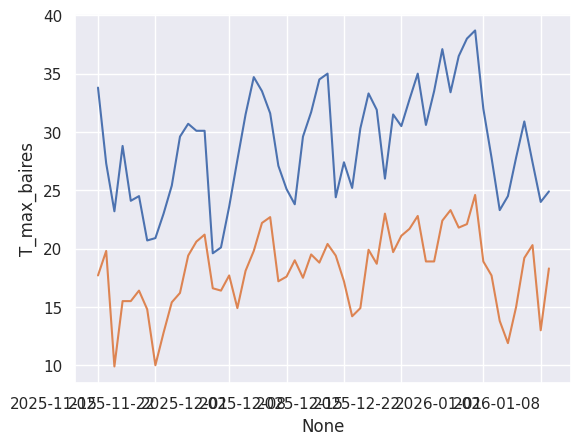

In [14]:
fig,ax = plt.subplots()
sns.lineplot(df, x=df.index, y='T_max_baires')
sns.lineplot(df, x=df.index, y='T_min_baires')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")




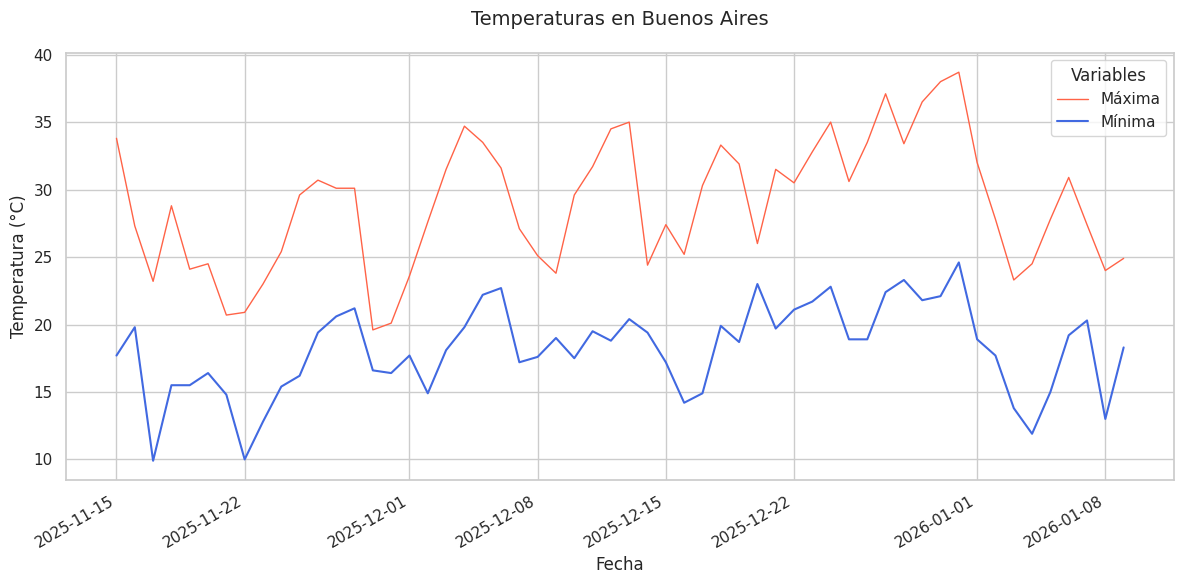

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Configurar el estilo visual
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))

# Graficar con etiquetas y colores específicos
sns.lineplot(data=df, x=df.index, y='T_max_baires', ax=ax,
             label='Máxima', color='tomato', linewidth=1)
sns.lineplot(data=df, x=df.index, y='T_min_baires', ax=ax,
             label='Mínima', color='royalblue', linewidth=1.5)

# Mejorar el formato de los ejes
ax.set_title('Temperaturas en Buenos Aires', fontsize=14, pad=20)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Temperatura (°C)', fontsize=12)

# Rotación automática de fechas para que no se solapen
fig.autofmt_xdate()

# Opcional: Ajustar la frecuencia de los ticks si hay muchos datos
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.legend(title='Variables')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("ejemplo.csv", index=False)


# Actividad a realizar:

1) Optimizar al máximo el gráfico de temperatura utilizado en clase, el cual presenta un amplio margen de mejora. Asegúrese de mejorar aspectos como diseño, claridad y presentación visual.


2) Aplicar el mismo procedimiento para obtener además de temperatura en una ubicación geográfica de su elección, la humedad relativa promedio como variable adicional.


3) Elaborar un gráfico de dispersión (scatter plot) que muestre la relación entre la temperatura promedio y la humedad relativa promedio. Analice e indique si existe alguna correlación entre estas dos variables.



